### ADALINE ###
PARÂMETROS: 
	 Taxa de aprendizagem:  0.01
	 Número máximo de épocas:  200
	 Total de realizações:  2 

### REALIZAÇÃO  1 ##########
MSE: &  0.30535
RMSE: &  0.55259
##########################
### REALIZAÇÃO  2 ##########
MSE: &  0.44488
RMSE: &  0.66699
##########################
MSE médio:  0.37511
RMSE médio:  0.60979
Desvio Padrão:  0.13952756259397325
Plotando dados com o MSE minimo: 


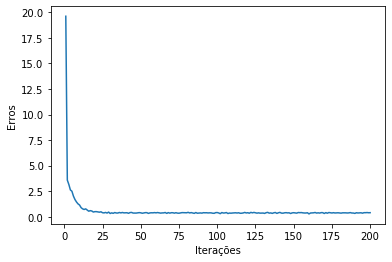

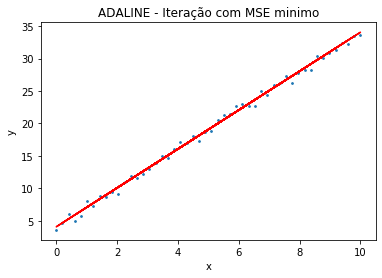

### FIM ADALINE ###


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate function ax + b
def generateData2D(a, b):
    x = np.linspace(0,10,50)
    y = a * x + b
    data = []
    for i in range(len(y)):
        y[i] += np.random.uniform(-1.0, 1.0)

    for i, j in zip(x, y):
        data.append([i, j])
    
    data = np.asarray(data)
    data = insertbias(data)

    return np.asarray(data)

# Insert Bias
def insertbias(data):
    new = []
    for i in range(len(data)):
        new.append(np.insert(data[i], 0, -1))
    return np.asarray(new)

# Normalize data
def normalize(data):
    c = data.shape[1] - 1
    for i in range(data.shape[1]):
        if(i < c):
            max_ = max(data[:, i])
            min_ = min(data[:, i])
            for j in range(data.shape[0]):
                data[j, i] = (data[j, i] - min_) / (max_ - min_)
    return data

# Divide into train and test
def divide(data):
    np.random.shuffle(data)
    return data[0: int(len(data) * 0.8)], data[int(len(data) * 0.8):]

# Create weights
def createWeights(length):
    w = np.random.rand(1, length-1)[0]
    return w

# Update weights 
def updateWeights(x, erro, weights, rate):
    return weights + (rate) * (erro) * x[0:len(x) - 1]

# Predict
def predict(x, weights):
    return np.dot(weights, x[0:len(x)-1])

# Get error
def iterationError(x, weights):
    y = predict(x, weights)
    d = desired_output(x)
    return d - y

# get class
def desired_output(x):
    return x[len(x)-1]

# Training
def training(training_set, weights, rate, epochs):
    epoch = 0
    trainingErrors = []

    while epoch < epochs:
        error = np.array([])

        for i in training_set:
            e = iterationError(i, weights)
            weights = updateWeights(i, e, weights, rate)
            error = np.append(error, e*e)
        epoch += 1

        epochError = error.mean()
        np.random.shuffle(training_set)
        trainingErrors.append(epochError)

    return weights, trainingErrors

# Test
def test(test_set, weights):
    testerrors = []
    
    for i in test_set:
        e = iterationError(i, weights)
        testerrors.append(e*e)
    return np.mean(testerrors)

# Evaluate an algorithm using hold-out
def execute(dataset, realizations, learning_rate, epochs):
    print("### ADALINE ###")
    print("PARÂMETROS: ")
    print("\t Taxa de aprendizagem: ", learning_rate)
    print("\t Número máximo de épocas: ", epochs)
    print("\t Total de realizações: ", realizations, "\n")
    data = dataset
    error = []
    sqrt = []
    allweights = []
    training_errors = []
    test_errors = []
    
    for i in range(realizations):
        print("### REALIZAÇÃO ", (i+1), "##########")
        
        weights = createWeights(data.shape[1])
        np.random.shuffle(data)  # shuffle entre realizações
        
        training_set, test_set = divide(data)
        
        weights, errors_training = training(training_set, weights, learning_rate, epochs)
        training_errors.append(errors_training)
        allweights.append(weights)
        
        errors_test = test(test_set, weights)
        test_errors.append(errors_test)

        mse = np.mean(test_errors)
        rmse = np.sqrt(mse)
        error.append(mse)
        sqrt.append(rmse)
        
        print("MSE: & ", round(mse, 5))
        print("RMSE: & ", round(rmse, 5))
        print("##########################")

        
    print("MSE médio: ", round((sum(error) / realizations), 5))
    print("RMSE médio: ", round((sum(sqrt) / realizations), 5))
    
    postprocessing(test_errors, training_errors, data, allweights)
    print("### FIM ADALINE ###")

def postprocessing(test_errors, training_errors, dataset, allweights):
    auxmin = 1000
    min = 0
    for i in range(len(test_errors)):
        if test_errors[i] <= auxmin:
            min = i
            auxmin = test_errors[i]

    print('Desvio Padrão: ', np.std(test_errors))
    print('Plotando dados com o MSE minimo: ')

    plotError(training_errors[min])
    plotData2d(dataset, allweights[min])

def plotError(error):
    plt.plot(range(1, len(error) + 1), error)
    plt.xlabel('Iterações')
    plt.ylabel('Erros')
    plt.show()

def plotData2d(dataset, w):
    y =[]
    for i in dataset:
        y.append(np.dot(w, i[0:len(i)-1]))

    plt.scatter(dataset[:, 1], dataset[:, -1], s=3)
    plt.plot(dataset[:, 1], y, color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('ADALINE - Iteração com MSE minimo')
    plt.show()
    
A = 3
B = 4
REALIZATIONS = 2
RATE = 0.01
EPOCHS = 200

dataset = generateData2D(A, B)
execute(dataset, REALIZATIONS, RATE, EPOCHS)